<a href="https://colab.research.google.com/github/Jonny-T87/ML-Projects/blob/main/LogisticRegCustChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import jaccard_score
import itertools
%matplotlib inline
import matplotlib.pyplot as plyv


## Loading Data

In [7]:
!wget - O ChurnData.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv

--2024-06-26 02:37:01--  http://-/
Resolving - (-)... failed: Name or service not known.
wget: unable to resolve host address ‘-’
--2024-06-26 02:37:01--  http://o/
Resolving o (o)... failed: Name or service not known.
wget: unable to resolve host address ‘o’
--2024-06-26 02:37:01--  http://churndata.csv/
Resolving churndata.csv (churndata.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘churndata.csv’
--2024-06-26 02:37:01--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35943 (35K) [te

In [8]:
#Loading data
df = pd.read_csv("ChurnData.csv")
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [9]:
#check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    float64
 18  pager     200 non-null    float64
 19  internet  200 non-null    float64
 20  callwait  200 non-null    float6

In [10]:
#checking data stats
df.describe()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.00000,200.000000,200.000000,200.000000,200.00000,...,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,35.505000,41.165000,11.650000,75.130000,2.82500,10.22500,0.425000,0.705000,0.290000,11.78925,...,0.275000,0.440000,0.45500,0.460000,0.440000,2.193285,3.229185,3.951015,2.475000,0.290000
std,21.640971,13.076803,10.158419,128.430468,1.28555,8.95743,0.495584,0.457187,0.454901,9.88725,...,0.447635,0.497633,0.49922,0.499648,0.497633,0.731282,0.281019,0.752553,1.079445,0.454901
min,1.000000,19.000000,0.000000,9.000000,1.00000,0.00000,0.000000,0.000000,0.000000,1.10000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.095000,1.749000,2.197000,1.000000,0.000000
25%,16.750000,31.000000,3.000000,31.000000,2.00000,3.00000,0.000000,0.000000,0.000000,5.53750,...,0.000000,0.000000,0.00000,0.000000,0.000000,1.711750,3.226500,3.434000,2.000000,0.000000
50%,33.500000,40.000000,9.000000,48.000000,3.00000,7.50000,0.000000,1.000000,0.000000,8.25000,...,0.000000,0.000000,0.00000,0.000000,0.000000,2.110000,3.240000,3.871000,2.000000,0.000000
75%,55.250000,51.000000,18.000000,80.000000,4.00000,17.00000,1.000000,1.000000,1.000000,14.30000,...,1.000000,1.000000,1.00000,1.000000,1.000000,2.660000,3.240000,4.382000,3.000000,1.000000
max,72.000000,76.000000,48.000000,1668.000000,5.00000,44.00000,1.000000,1.000000,1.000000,62.30000,...,1.000000,1.000000,1.00000,1.000000,1.000000,4.132000,4.227000,7.419000,4.000000,1.000000


In [11]:
df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn'],
      dtype='object')

In [12]:
#transforming churn column to int
churn_df = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat']]
X = churn_df
y = df['churn'].astype('int')
print ('Shape of X: {}'.format(X.shape))
print ('Shape of y: {}'.format(y.shape))

Shape of X: (200, 27)
Shape of y: (200,)


In [13]:
#train test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 27) (160,)
Test set: (40, 27) (40,)


In [14]:
#normalizing data
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train.astype(float))
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))

In [15]:
#checking feature trained data
print (X_train[0:5])

[[ 1.10059961  0.12260059 -0.75125133  0.17861672 -0.65318537  1.25894835
  -0.83793058  0.65465367 -0.60623541  0.23042639 -0.81943688 -0.78746053
   0.46388941 -0.53830689  0.36568919 -0.59731636  0.62023967 -0.6644106
  -0.61588176 -0.8819171  -0.91601335  1.06458129 -0.85972695  0.61165597
  -0.01722426  0.88792153 -0.47673129]
 [ 0.87106893  0.04656922 -1.14024878 -0.15003804  0.86144738 -0.91986978
   1.19341628  0.65465367  1.64952424  0.30020174  2.5996161   2.37153073
   0.35981513  3.24277246  0.1935613   2.99547909  0.46171196  1.50509339
   1.62368828  1.13389342  1.09168714  1.06458129  1.16316     0.67689927
   2.77828453  0.09278744  1.43019388]
 [ 0.9628812   0.88291432  1.09648657  0.17147205  1.61876375  0.3874211
   1.19341628  0.65465367 -0.60623541  0.28409974 -0.81943688  0.95087416
  -0.31666767 -0.53830689  0.27467015 -0.59731636 -0.07400238  1.50509339
  -0.61588176  1.13389342 -0.91601335 -0.93933644  1.16316     0.66271594
  -0.01722426  0.87484366 -0.4767312

In [16]:
#checking feature test data
print (X_test[0:5])

[[ 0.46323419 -0.02189173  0.48926366  0.91190029  1.19990603  0.33880516
   1.05131497  0.61588176 -0.77459667  0.57694881 -1.01628406  0.59641414
  -0.04938131 -0.70125077  0.29171495 -0.76988576 -0.06098371 -0.57735027
  -0.61588176  1.1055416  -0.90453403 -0.85972695  1.          0.91094897
   0.25912729  1.2097478  -0.31871639]
 [ 0.75351149 -0.57913573 -1.08900621 -0.19193565 -1.51686234 -0.42830086
  -0.95118973  0.61588176  1.29099445  0.40218043  1.21279497 -0.90210717
   1.59666223  0.79060537  0.33912254  1.62672277  1.39127036  1.73205081
   1.62368828 -0.90453403  1.1055416   1.16316    -1.          0.77655017
   0.64852621  0.12070252  1.38110434]
 [-0.35921816 -0.97716716 -1.08900621 -0.85094218 -1.51686234 -0.17259885
  -0.95118973 -1.62368828 -0.77459667 -0.04539715 -1.01628406 -0.90210717
  -0.97430101 -0.70125077 -0.33626123 -0.76988576 -0.72375738 -0.57735027
  -0.61588176 -0.90453403 -0.90453403 -0.85972695 -1.          0.34525219
   0.25912729 -1.47365977 -1.16862

In [17]:
#Setting up Model
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [18]:
#Predicting
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [19]:
jaccard_score(y_test, yhat)

0.3181818181818182

In [20]:
#Confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.69      0.72      0.71        25
           1       0.50      0.47      0.48        15

    accuracy                           0.62        40
   macro avg       0.60      0.59      0.59        40
weighted avg       0.62      0.62      0.62        40



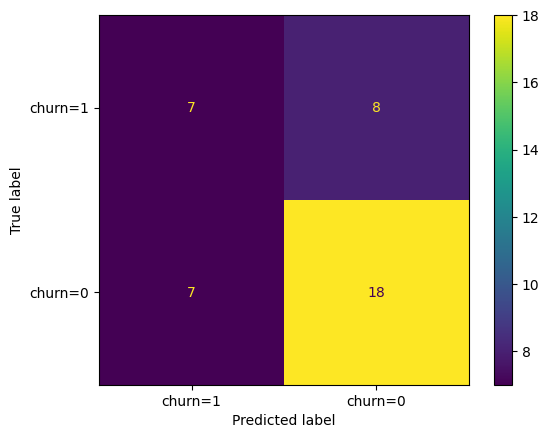

In [53]:
#Displying Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=['churn=1','churn=0'])
disp.plot()
plt.show()